# Pràctica 2: Llei del refredament

## 1. El problema del cafè
Guardem les dades d'evolució temporal de la temperatura del cafè

In [124]:
Temp = [85, 73, 64, 58]
TempEnElTemps = zip(range(0,91,30), Temp)
show(TempEnElTemps)
TAmb = 15

[(0, 85), (30, 73), (60, 64), (90, 58)]

La llei de refredament de Newton ens dóna l'equació diferencial que governa l'evolució de la temperatura, $T' = -k(T - T_e)$ on $T_e$ és la temperatura ambient. Si imposem condicions inicials $T(0) = T_0$ la solució és $$ T(t) = T_e + (T_0 - T_e) e^{-kt} $$

Fem un gràfic de diferents solucions en funció de la condició inicial $T_0$

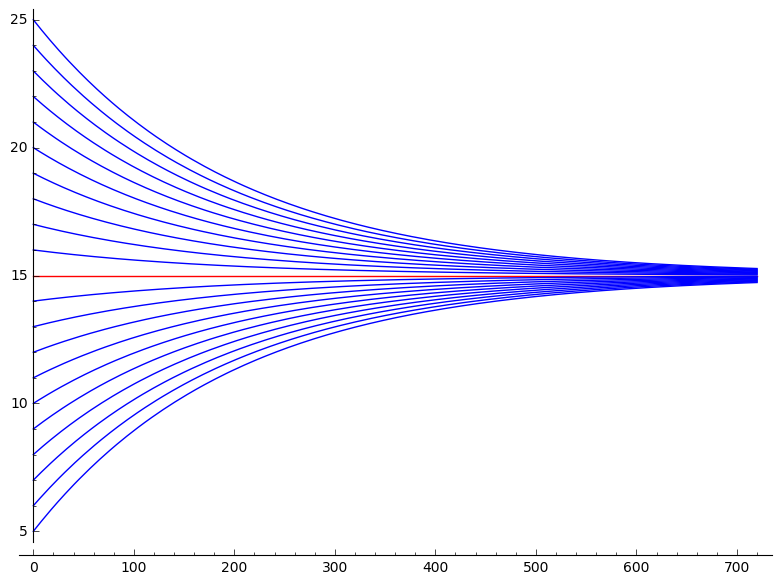

In [125]:
var('k, T0')
T(t) = TAmb + (T0 - TAmb)*exp(-k*t)
Ts = filter(lambda x: x!= TAmb, map(lambda x: x, range(5,26,1)))
sols1 = map(lambda x: T.subs(k == 0.005, T0 == x), Ts) 
grafics1 = map(lambda f: plot(f(t), xmin = 0, xmax = 720), sols1)
plot(TAmb, xmin = 0, xmax = 720, color = 'red') + reduce(lambda a, b:  a+b, grafics1)

Aproximem la derivada de la temperatura

In [126]:
dTemp= map(lambda T1, T2: (T1 - T2)/30, Temp[1:], Temp[:-1])
show(dTemp)

[-2/5, -3/10, -1/5]

Veiem com evoluciona la relació entre $T'$ i $T - T_e$

In [127]:
kAprox = map(lambda dT, T : -dT/(T - TAmb), dTemp, Temp[:-1])
show(kAprox)

[1/175, 3/580, 1/245]

Calculem la mitjana d'aquestes aproximacions

In [128]:
kAvg = reduce(lambda a,b : a + b, kAprox)/len(kAprox)
show(kAvg.n())

0.00498944405348346

Fem una gràfica fent servir aquest valor de $k$

In [129]:
sol = T.subs(T0 == Temp[0], k == kAvg)

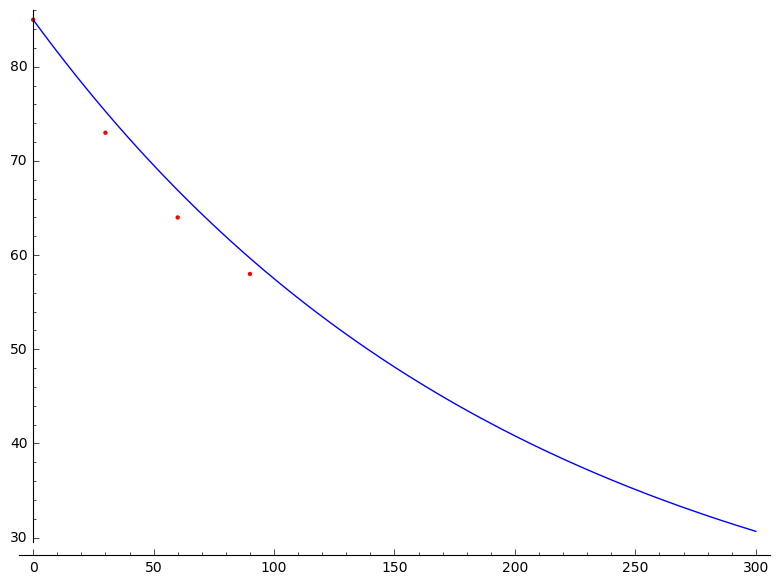

In [130]:
plot(sol(t), xmin = 0, xmax = 300) + list_plot(TempEnElTemps, color = 'red')

Fem servir el model per predir la temperatura al cap de 5 minuts

In [133]:
show(sol(300).n())

30.6686519621892

També podem saber el temps que ha de passar per poder prendre el cafè a $35 ºC$

In [135]:
t35 = find_root(sol(t) == 35, 0, 1000) / 60
show(t35)

4.184711279341603

## 2. El problema de mantenir el cafè calent

Volem valorar per a quin valor de $k$ el cafè es mantindrà per sobre dels $35ºC$ durant els primers 10 minuts

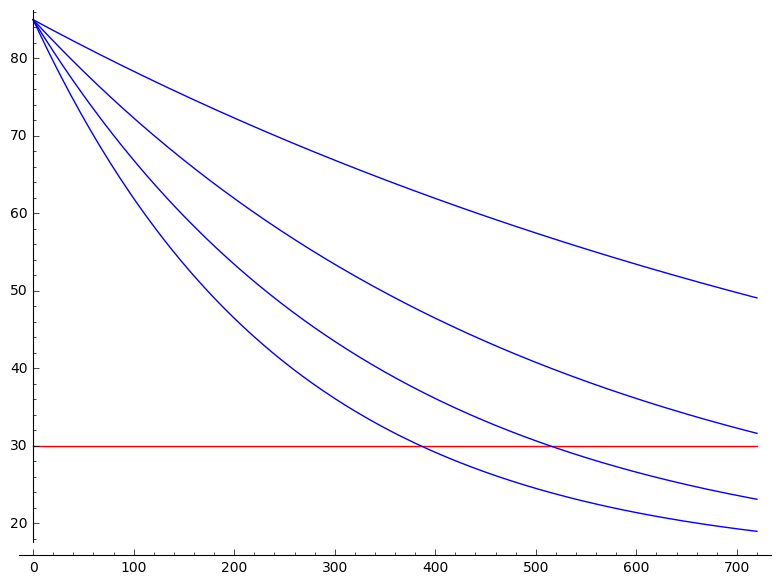

In [136]:
ks = map(lambda x: x*0.001, range(1,5))
sols = map(lambda x: T.subs(T0 == Temp[0], k == x), ks)
grafics = map(lambda f : plot(f(t), xmin = 0, xmax = 720), sols)
plot(30, xmin = 0, xmax = 720, color = 'red') + reduce(lambda a, b:  a+b, grafics)

Veiem que $k \in [0.002, 0.003]$. Podem refinar l'aproximació

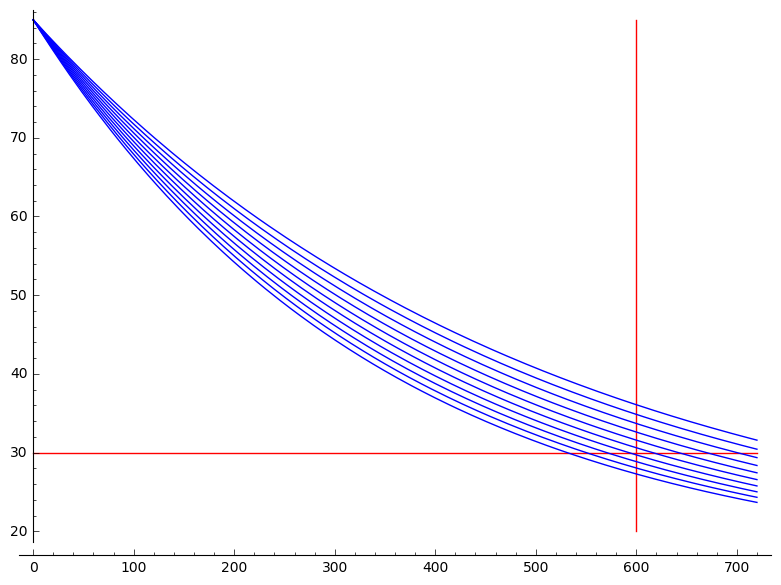

In [143]:
ks = map(lambda x: 0.002 + x*0.0001, range(10))
sols = map(lambda x: T.subs(T0 == Temp[0], k == x), ks)
grafics = map(lambda f : plot(f(t), xmin = 0, xmax = 720), sols)
plot(30, xmin = 0, xmax = 720, color = 'red') + line([(600,20), (600,85)], color = 'red') + reduce(lambda a, b:  a+b, grafics)

I per tant $k \in [0.0025, 0.0026]$. Per a trobar el valor exacte podem solucionar l'equació.

In [145]:
minim = T.subs(T0 = Temp[0])
kMin = find_root(minim(600) == 30, 0.0025, 0.0026)
show(kMin)

0.00256740840161252

Modelem ara l'evolució de la temperatura del cafè si tenim un escalfador que proporciona un flux de temperatura $q$, de manera que ara l'equació diferencial és $$T' = q - k(T - T_e)$$

In [140]:
var('t, q'); function('f')(t)
T2(t) = desolve(diff(f(t), t) == q - k*(f(t) - TAmb), [f(t), t], ics = [0, Temp[0]])

Fem un gràfic de les solucions per a diferents valors de $q$

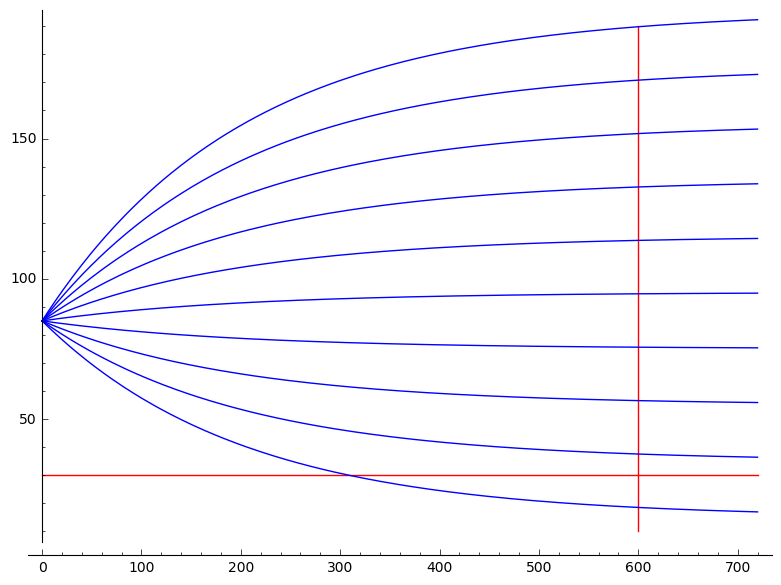

In [146]:
qs = map(lambda x: x*0.1, range(10))
sols2 = map(lambda x: T2.subs(k == kAvg, q == x), qs)
grafics = map(lambda f : plot(f(t), xmin = 0, xmax = 720), sols2)
plot(30, xmin = 0, xmax = 720, color = 'red') + line([(600,10), (600,190)], color = 'red') + reduce(lambda a, b:  a+b, grafics)